# Coulomb's law

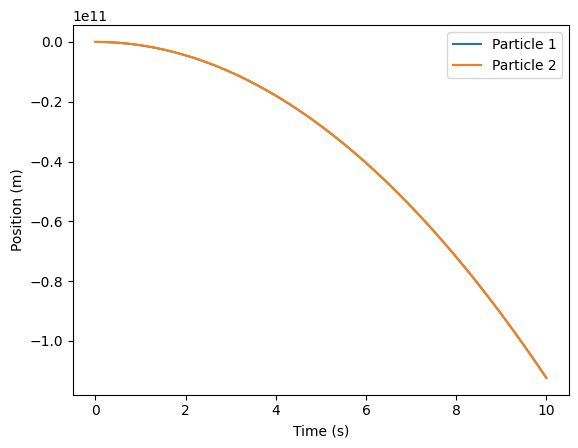

In [48]:
# Import the necessary modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the Coulomb constant
k = 8.99e9  # N m^2 / C^2

# Define the charges of the particles
q1 = 1  # C
q2 = -1  # C

# Define the mass of the particles
m1 = 1  # kg
m2 = 1  # kg

# Define the initial positions and velocities of the particles
x1_0 = 1  # m
x2_0 = -1  # m
v1_0 = 0  # m/s
v2_0 = 0  # m/s

# Define the differential equations describing the motion of the particles
def coulomb_law(state, t):
    x1, x2, v1, v2 = state

    # Compute the acceleration of the particles using Coulomb's law
    a1 = k * q1 * q2 / (x1 - x2)**2
    a2 = k * q1 * q2 / (x2 - x1)**2

    # Return the differential equations
    return [v1, v2, a1 / m1, a2 / m2]

# Define the time grid for the simulation
t = np.linspace(0, 10, 100)

# Define the initial state of the system
state0 = [x1_0, x2_0, v1_0, v2_0]

# Solve the differential equations describing the motion of the particles
state = odeint(coulomb_law, state0, t)

# Extract the position of the particles from the state array
x1, x2 = state[:, 0], state[:, 1]

# Plot the position of the particles over time
plt.plot(t, x1, label='Particle 1')
plt.plot(t, x2, label='Particle 2')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()


# Faraday's law of induction

In [58]:
# Import the necessary modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the parameters of the circuit
L = 1  # H
R = 1  # Ω
N = 100  # turns
B = 1  # T
A = 1  # m^2

def compute_dI_dt(I, t):
    # Compute the time derivative of I
    dI_dt = np.gradient(I, t)

    # Return the time derivative of I
    return dI_dt

# Define the differential equation describing the induced EMF in the circuit
def faraday_law(I, t):
    # Compute the induced EMF using Faraday's law
    E = -N * A * B * np.gradient(I, t)

    # Return the differential equation
    return E

# Define the time grid for the simulation
t = np.linspace(0, 10, 100)

# Define the initial current in the circuit
I0 = 1  # A

# Solve the differential equation describing the induced EMF in the circuit
E = odeint(faraday_law, I0, t)

# Plot the induced EMF over time
plt.plot(t[1:], E)
plt.xlabel('Time (s)')
plt.ylabel('EMF (V)')
plt.show()


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

# Ampere's law

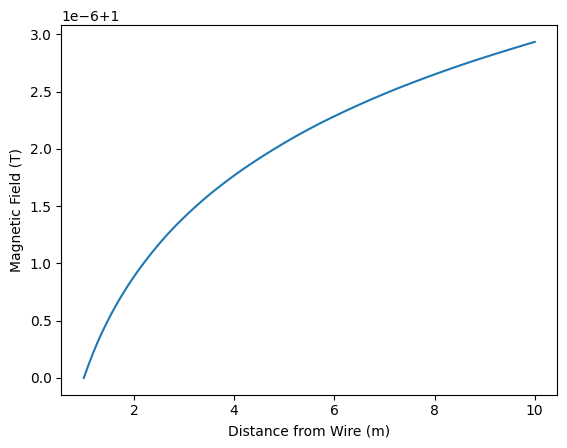

In [52]:
# Import the necessary modules
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Define the magnetic field around a current-carrying wire
def magnetic_field(I, x):
    # Define the permeability of free space
    mu = 1.26e-6  # H/m

    # Compute the magnetic field around the wire
    B = mu * I / x

    # Return the magnetic field around the wire
    return B

# Define the initial current and position grid for the simulation
I = 1  # A
x = np.linspace(1, 10, 100)  # m

# Solve the differential equation describing the magnetic field
B = odeint(magnetic_field, I, x)

# Plot the magnetic field around the wire
plt.plot(x, B)
plt.xlabel('Distance from Wire (m)')
plt.ylabel('Magnetic Field (T)')
plt.show()

# Ampere's law

/Users/slavik/.pyenv/versions/miniforge3/lib/python3.9/site-packages/scipy/integrate/_ivp/base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


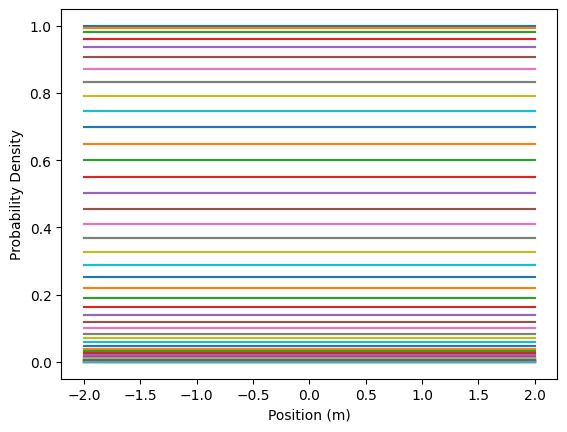

In [54]:
# Import the necessary modules
import numpy as np
from scipy.integrate import solve_ivp

# Define the potential energy of the particle
def potential(x):
    # Compute the potential energy of the particle
    V = np.heaviside(x, 0.5) * (x**2 - 1)

    # Return the potential energy of the particle
    return V

# Define the Schrödinger equation for the particle
def schrodinger(t, psi):
    psi_deriv1 = np.gradient(psi, x)
    psi_deriv2 = np.gradient(psi_deriv1, x)
    # Define the kinetic energy of the particle
    T = -1 / 2 * psi_deriv2

    # Define the potential energy of the particle
    V = potential(x) * psi

    # Compute the Schrödinger equation for the particle
    dpsi_dt = 1j * (T + V)

    # Return the Schrödinger equation for the particle
    return dpsi_dt

# Define the grid of positions and times
x = np.linspace(-2, 2, 100)
t = np.linspace(0, 10, 100)

# Define the initial state of the particle
psi_0 = np.exp(-x**2)

# Solve the Schrödinger equation for the particle
psi_t = solve_ivp(schrodinger, (0, 10), psi_0, t_eval=t)

# Compute the probability density of the particle at each time
rho_t = np.abs(psi_t.y)**2

# Plot the probability density of the particle over time
plt.plot(x, rho_t.T)
plt.xlabel('Position (m)')
plt.ylabel('Probability Density')
plt.show()


# Maxwell's equations

In [55]:
# Import the necessary modules
import numpy as np
from scipy.linalg import expm

# Define the quantum state of the particle
psi_0 = 1 / np.sqrt(2) * np.array([[1], [1]])

# Define the measurement operator for the particle
M = np.array([[1, 0], [0, -1]])

# Compute the state of the particle after the measurement
psi_measured = M @ psi_0

# Print the state of the particle after the measurement
print(f'psi_measured = {psi_measured.T}')

psi_measured = [[ 0.70710678 -0.70710678]]
